---

# Deutsch Algorithm

The Deutsch-Jozsa Algorithm presents  a class of problem which can be described as: 

## Introduction
The Deutsch Algorithm also known as Deutsch-Jozsa Algorithm describes a solution to a class of problem that can be solved more efficiently by means of quantum computation.
It demonstrates a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm for a specifically designed problem.
The problem in question which will be referred to as the `Deutsch-Jozsa problem` in this text, is a black-box problem which can be solved efficiently by a quantum computer
with no error. Before delving further into the algorithm, the next section talks about the formulation of the problem.



### Deutsch-Jozsa Problem

The Deutsch-Jozsa Problem can be stated as follows, given a function $f$ that takes $n$ bits as input and outputs either $0$ or $1$, ie. $f: \{0, 1\} ^n \to \{0, 1\}$, 
determine if the function is constant or balanced. Constant in this context is when for all inputs the output is either $0$ s or $1$ s 
and balanced when the output for half of the possible inputs are exclusive (half of the output $0$ s and other half $1$ s). The problem is such that for all possible
input domain we are promised that the outputs will either be constant or balanced. This can be stated as follows:

Having a black box device say $U_{f}$, that computes a function $f: D_m \to R_n $. For a given input of $x, U_f$ will output a value of $f(x)$. The definition of the 
problem states that when given $U_f$, then using it to determine determine some property of $f$ while making the least possible number of calls to $U_f$. The problem
definition assumes that $U_f$ is an oracle for $f$ and there is not faster method of obtaining the property of $f$ from the oracle $U_f$ than making sufficient number
of calls to $U_f$ to be able to conclusively ascertain the property of $f$.

$$ 
  f: \{0, 1\} ^ {n} \to \begin{cases} 
  0 & \text{if} &
   \sum\limits_{i = 1} ^ {n} \bigl( f(x_{i}) = 1 \bigr) =  \sum\limits_{i = 1} ^ {n} \bigl( f(x_{i}) = 0 \bigr) 
        \\
  1 & \text{if} &
     \sum\limits_{i=1}^n \bigl( f(x_{i}) = k\bigr) = n & k \in \{0, 1\}
    \end{cases} 
$$

> Where `n` is the number of possible inputs, $x_{i}$ is the $i$`th` possible input

#### Classical Algorithm
Modeling a solution to this class of problem using a classical algorithm will involve iteratively calling the function and noting the output, until one can 
conclude that the function is either constant or balanced.
For a function that accepts $n$ bits binary input, the input domain will be $2^{n}$ input domain. The function can be said to be balanced as soon as the function returns 
two different values given some input from the input domain. In such case where the first two different output values given some input are observed is considered a best 
case scenario. 
##### **Best Case Scenario**
For this class of problem, the very best case scenario will be when the first two inputs returns exclusive result. We can and this point, authoritatively state that the 
function is balanced.     
##### **Worst Case Scenario**
However, after getting the result from the first input $x_{0}$, say $g$ where $g\in\{0, 1\}$. As subsequent inputs in the input domain keeps returning the same value 
$g$, we cannot for obvious reasons conclude that function is either constant or balanced. Since we were promised that the function is either balanced or constant and 
nothing in-between, there  will be a point where we can conclude that the function cannot possibly be balanced. This point is at the $i$ th trial, where 
$i = \bigl( \frac{2^{n}}{2} \bigr) + 1.$ This can be re-written as $2^{n - 1} + 1$, and considered the worst case scenario. 
$$$$
The scenarios can be represented diagrammatically as below. 

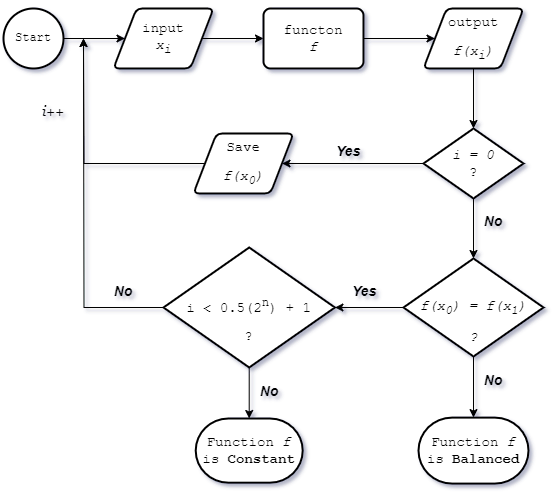

<u>*Figure 1*</u>





### Quantum Solution with Deutsch-Jozsa Algorithm

This section presents how this problem can be solved more efficiently using a quantum algorithm. Before delving into the Deutsch-Jozsa Algorithm, we first of all introduce some
conventions and theories to help proof the applicability and feasibility of the algorithm and finally implement the algorithm using Qitskit framework.



#### Quantum Information 

To aid present quantum information, we will be introducing some notations with their classical equivalent side by side and also perform classical operations using this notations. 

**Classical States**

This represents the state of a classical information at any given point in time. Consider an one bit information which is either the state '0' or '1', this is analogous to a piece of tossed fair coin which can either be the head or tail. For the purpose of this text, we consider the head as '0' and the tail as '1'. We can say that the probability of the coin flipping to a '0' or a '1' is 50% - 50% i.e. $P(0) = 0.5$ and $P(1) = 0.5$. This can be represented by a probability vector of the form $\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}$. Vectors of this form (probability) are stochastic in nature and are such that the sum of the columns must always add up to 1. This is very intuitive as this represents the set of possible outcomes with flipping a coin. However, I have personally seen a coin land on it's side (perimeter). Although this is extremely rare thus we can represent the vector as something like this $\begin{bmatrix}0.49\\0.49\\0.01\end{bmatrix}$. For the sake of simplicity and  clarity we will stick to our initial assumption. It is important to note that representing the state of the coin in this form puts emphasis on the order, i.e. if the coin eventually turns out as a head then we have the classical state of the coin as $\begin{bmatrix}1\\0\end{bmatrix}$ while if it turns out to be a tail then we have the state as $\begin{bmatrix}0\\1\end{bmatrix}$. The first value of the matrix represents the 'head' and the second 'tail'. 

**Dirac Notation**


This probability vector can also be represented in a more succinct way known as the Dirac notation. This notation is useful because of the limitations of expressing a probability vector as either a column or row vector. This comes in handy when dealing with quantum state vectors, as it can be used to implicitly represent tensor product between two quantum state vectors as we will see later in this text.

The above mentioned classical states of our hypothetical coin can be represented in Dirac notation like this: $\ket{0} = \begin{bmatrix}1\\0\end{bmatrix},  \ket{1} = \begin{bmatrix}0\\1\end{bmatrix}$. This form of column probability vector is called `ket 0`

**Deterministic operation**

These are operations that can be performed on a classical state system. Consider a classical state system in a state $a$ where $a$ can be in either state `0` or `1` i.e. $a \in \Sigma$ where $\Sigma = \{0, 1\}$, and is transformed to $f(a)$ by some function $f$. There are $n^{n^{k}}$ possible operations for $m$ number of system with $n$ possible states. Using our coin as an example once again, there are 4 possible deterministic things we can do with a single coin. 

When given a coin we can: 
- Ignore which state it is in and just flip (if necessary) to a head. 
- Look at it and return it as it is.
- Look at it and flip it to the opposite side, i.e. head $\to$ tail or tail $\to$ head
- Ignore which state it is in and flip (if necessary) to a tail.


These operations that can be done to a single coin can be summarized in the table below.

 $a$| $f_1(a)$ | $f_2(a)$ | $f_3(a)$ | $f_4(a)$ 
 :-: | :-: | :-: | :-: | :-: 
 0 | 0 | 0 | 1 | 1 
 1 | 0 | 1 | 0 | 1

 <u>*Table 1*</u>

The functions $f_1, f_2, f_3$, and $f_4$ reflects the four different operations we previously did to the coin. 
- $f_1 \to$ returns only head. This function is called the constant (head) function.
- $f_2 \to$ returns the input. This function is called the identity function.
- $f_3 \to$ flips the input. This function is called the NOT function.
- $f_4 \to$ returns only tail. This function is called the constant (tail) function.

Interestingly, these operations could be represented as a $n \times n$ square stochastic matrices operating on the state of the system (coin in this case).

To evaluate these matrices, consider a matrix $M_1$ that represents the operation of the function $f_1$ (constant `0` function). This implies that $M_1$ should be such that $M_1 \times \begin{bmatrix}1\\0\end{bmatrix}$ = $\begin{bmatrix}1\\0\end{bmatrix}$; and $M_1 \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}$. 


To evaluate the matrix $M_1$, assume that the matrix is composed of the following values; $\begin{bmatrix}m_{1,1} & M_{1_{1, 2}}\\m_{2,1} & m_{2,2}\end{bmatrix}$

To evaluate these matrices, we make the following assumptions. 





Plugging in the values of $m_{1,1}, .. m{2,2}$ we have the matrix $M_1 = \begin{bmatrix}1&1\\0&0\end{bmatrix}$


Applying the same step to evaluate what will be the equivalent matrix for function $f_2$(the identity function), say $M_2$. Without much ado that function is $M_2 = \begin{bmatrix}1&0\\0&1\end{bmatrix}$. For the sake of validating our approach, we will go through the same steps as before to proof its applicability. 

This shows that $M_2 = \begin{bmatrix}1&0\\0&1\end{bmatrix}$.

The other matrices $M_3, and M_4$ can be evaluated using the same steps. The values are summarized below. 
$$
    M_1 = \begin{bmatrix}1 & 1\\0 & 0\end{bmatrix} \qquad M_2 = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}, \qquad M_3 = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix},
    \qquad M_4 = \begin{bmatrix}0 & 0\\1 & 1\end{bmatrix}
$$




This is consistent with the formula stated above because in the case of a single coin ($k=1$), there are two possible states (head or tail i.e. $n=2$), then $n^{n^{k}} = 2^{2^1} = 4$


##### Assumptions
To evaluate the equivalent matrics for $f_1, f_2, f_3 and f_4$, we make the following assumptions. 


$
        M_1 = \begin{bmatrix}M_{1_{1,1}} & M_{1_{1,2}} \\ M_{1_{2,1}} & M_{1_{2,2}}\end{bmatrix}, \quad
        M_2 = \begin{bmatrix}M_{2_{1,1}} & M_{2_{1,2}} \\ M_{2_{2,1}} & M_{2_{2,2}}\end{bmatrix}, \quad
        M_3 = \begin{bmatrix}M_{3_{1,1}} & M_{3_{1,2}} \\ M_{3_{2,1}} & M_{3_{2,2}}\end{bmatrix}, \quad
        M_4 = \begin{bmatrix}M_{4_{1,1}} & M_{4_{1,2}} \\ M_{4_{2,1}} & M_{4_{2,2}}\end{bmatrix}
$



##### $M_1$ *The constant 0 function*

$
    M_1 \ket{0} = \ket{0}
$
$$
    \begin{equation*}\tag{1}
        \begin{bmatrix}M_{3_{1, 1}} & M_{1_{1, 2}}\\M_{1_{2, 1}} & M_{1_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
        \qquad
        \begin{bmatrix}
            M_{1_{1, 1}}(1) + M_{1_{1, 2}}(0) \\
            M_{1_{2, 1}}(1) + M_{1_{2, 2}}(0)
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}
        \qquad
        \begin{bmatrix}
             M_{1_{1, 1}} \\
             M_{1_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}
    \end{equation*}
$$
> $
    M_{1_{1, 1}} = 1, \quad M_{1_{2, 1}} = 0
$

$
    M_1 \ket{1} = \ket{0}
$
$$
\begin{equation*}\tag{2}
    \begin{bmatrix}M_{1_{1, 1}} & M_{1_{1, 2}}\\M_{1_{2, 1}} & M_{1_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{1_{1, 1}}(0) + M_{1_{1, 2}}(1) \\
        M_{1_{2, 1}}(0) + M_{1_{2, 2}}(1)
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{1_{1, 2}} \\
        M_{1_{2, 2}}
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
\end{equation*}
$$
> $
    M_{1_{1, 2}} = 1, \quad M_{1_{2, 2}} = 0
$
---

##### $M_2$ *The identity function*
$M_2 \ket{0} = \ket{0}$
$$
    \begin{equation*}\tag{3}
        \begin{bmatrix}M_{2_{1, 1}} & M_{2_{1, 2}}\\M_{2_{2, 1}} & M_{2_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
        \qquad

        \begin{bmatrix} 
            M_{2_{1, 1}}(1) + M_{2_{1, 2}}(0)  \\
            M_{2_{2, 1}}(1) + M_{2_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}
\qquad
        \begin{bmatrix}
            M_{2_{1, 1}} \\
            M_{2_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            1 \\ 0
        \end{bmatrix}

    \end{equation*}    
$$
> $
    M_{2_{1, 1}} = 1, \quad M_{2_{2, 1}} = 0
$


$M_2 \ket{1} = \ket{1}$
$$
\begin{equation*}\tag{4}
    \begin{bmatrix}M_{2_{1, 1}} & M_{2_{1, 2}}\\M_{2_{2, 1}} & M_{2_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{2_{1, 1}}(0) + M_{2_{1, 2}}(1) \\
        M_{2_{2, 1}}(0) + M_{2_{2, 2}}(1)
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{2_{1, 2}} \\
        M_{2_{2, 2}}
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
\end{equation*}
$$
> $
    M_{2_{1, 2}} = 0, \quad M_{2_{2, 2}} = 1
$
---

##### $M_3$ *The NOT function*
$M_3 \ket{0} = \ket{1}$
$$
    \begin{equation*}\tag{3}
        \begin{bmatrix}M_{3_{1, 1}} & M_{3_{1, 2}}\\M_{3_{2, 1}} & M_{_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
        \qquad

        \begin{bmatrix} 
            M_{3_{1, 1}}(1) + M_{3_{1, 2}}(0)  \\
            M_{3_{2, 1}}(1) + M_{3_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
\qquad
        \begin{bmatrix}
            M_{3_{1, 1}} \\
            M_{3_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}

    \end{equation*}    
$$
> $
    M_{3_{1, 1}} = 0, \quad M_{3_{2, 1}} = 1
$

$
    M_3 \ket{1} = \ket{0}
$
$$
\begin{equation*}\tag{2}
    \begin{bmatrix}M_{3_{1, 1}} & M_{3_{1, 2}}\\M_{3_{2, 1}} & M_{3_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}1\\0\end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{3_{1, 1}}(0) + M_{3_{1, 2}}(1) \\
        M_{3_{2, 1}}(0) + M_{3_{2, 2}}(1)
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{3_{1, 2}} \\
        M_{3_{2, 2}}
    \end{bmatrix}
    =
    \begin{bmatrix}
        1 \\ 0
    \end{bmatrix}
\end{equation*}
$$
> $
    M_{3_{1, 2}} = 1, \quad M_{3_{2, 2}} = 0
$
---

##### $M_4$ *The constant 1 function*
$M_4 \ket{0} = \ket{1}$
$$
    \begin{equation*}\tag{3}
        \begin{bmatrix}M_{4_{1, 1}} & M_{4_{1, 2}}\\M_{4_{2, 1}} & M_{_{2, 2}}\end{bmatrix} \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
        \qquad

        \begin{bmatrix} 
            M_{4_{1, 1}}(1) + M_{4_{1, 2}}(0)  \\
            M_{4_{2, 1}}(1) + M_{4_{2, 2}}(0) 
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}
\qquad
        \begin{bmatrix}
            M_{4_{1, 1}} \\
            M_{4_{2, 1}}
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 \\ 1
        \end{bmatrix}

    \end{equation*}    
$$
> $
    M_{4_{1, 1}} = 0, \quad M_{4_{2, 1}} = 1
$


$M_4 \ket{1} = \ket{1}$
$$
\begin{equation*}\tag{4}
    \begin{bmatrix}M_{4_{1, 1}} & M_{4_{1, 2}}\\M_{4_{2, 1}} & M_{4_{2, 2}}\end{bmatrix} \times \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{4_{1, 1}}(0) + M_{4_{1, 2}}(1) \\
        M_{4_{2, 1}}(0) + M_{4_{2, 2}}(1)
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
    \qquad
    \begin{bmatrix}
        M_{4_{1, 2}} \\
        M_{4_{2, 2}}
    \end{bmatrix}
    =
    \begin{bmatrix}
        0 \\ 1
    \end{bmatrix}
\end{equation*}
$$
> $
    M_{4_{1, 2}} = 0, \quad M_{4_{2, 2}} = 1
$
---

{bibliography}

See :cite:t:`perez2011python` for an introduction to non-standard analysis.
Non-standard analysis is fun \cite{1987:nelson}

.. bibliography::

Here is my nifty citation {cite}`perez2011python`.

```{bibliography}
```

# References

(<a id="cit-perez2011python" href="#call-perez2011python">Perez, Granger <em>et al.</em>, 2011</a>) Perez Fernando, Granger Brian E and Hunter John D, ``_Python: an ecosystem for scientific computing_'', Computing in Science \\& Engineering, vol. 13, number 2, pp. 13--21,  2011.

(<a id="cit-1987:nelson" href="#call-1987:nelson">?</a>) !! _This reference was not found in biblio.bib _ !!



```\References
```

C:\Users\intot\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


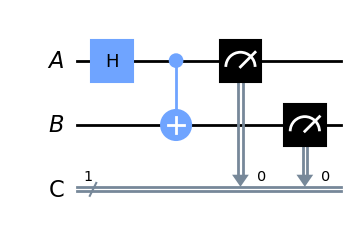

In [13]:
import qiskit as QS

A = QS.QuantumRegister(1, "A")
B = QS.QuantumRegister(1, "B")
C = QS.ClassicalRegister(1, "C")
# D = QS.ClassicalRegister(1, "D")

circuit = QS.QuantumCircuit(A, B, C)
circuit.h(A)
circuit.cx(A, B)
circuit.measure(A, C)
circuit.measure(B, C)
circuit.draw(output='mpl')

## Create a Simulator and run the circuit and observe the output

In [18]:
from qiskit import Aer,  transpile
simulator = Aer.get_backend('aer_simulator')
compiled = transpile(circuit, simulator)
result = simulator.run(compiled).result()
# compiled = transpile(circuit, simulator)
# circ = transpile(circuit, simulator)
result.get_counts()

{'1': 534, '0': 490}

***
### End